<a href="https://colab.research.google.com/github/lukaszplust/Projects/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.12.0


In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')# 60000 -> liczba probek, 28 x 28 -> rozmiar obrazu
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')# 10000 -> liczba probek, 28 x 28 -> rozmiar obrazu
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [4]:
print(X_train[0].shape)

(28, 28)


In [5]:
#Dzielenie przez 255 ma na celu przeskalowanie wartości pikseli, tak aby znajdowały się w zakresie od 0 do 1.
#Dzieje się tak, ponieważ większość algorytmów uczenia maszynowego lepiej radzi sobie z danymi numerycznymi w tym przedziale.

X_train = X_train / 255.
X_test = X_test /255.

(-0.5, 27.5, 27.5, -0.5)

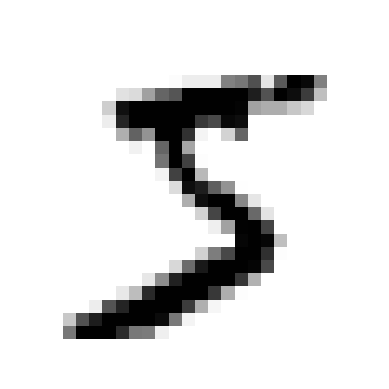

In [6]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off') # os x i y zostaje ukryta

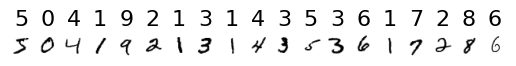

In [7]:
for i in range(1, 20):
    plt.subplot(1, 19, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))#w input_shape podaje rozmiar danych wejsciowych
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # metryka wzgledem której sprawdzamy jak dobrze działa model na zbiorze walidacyjnym

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Training model

In [9]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9765


Ocena modelu

In [10]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0799 - accuracy: 0.9744 - 672ms/epoch - 2ms/step


[0.07993291318416595, 0.974399983882904]

In [11]:
history

In [12]:
history.epoch

[0, 1, 2, 3, 4]

In [13]:
history.model

In [14]:
history.history

{'loss': [0.2932703495025635,
  0.1429588496685028,
  0.10772482305765152,
  0.08909831196069717,
  0.07600588351488113],
 'accuracy': [0.9151666760444641,
  0.9573166370391846,
  0.9665833115577698,
  0.9726999998092651,
  0.9764833450317383]}

In [15]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293270,0.915167
1,0.142959,0.957317
2,0.107725,0.966583
3,0.089098,0.972700
4,0.076006,0.976483


In [16]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [17]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 1ms/step


In [18]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

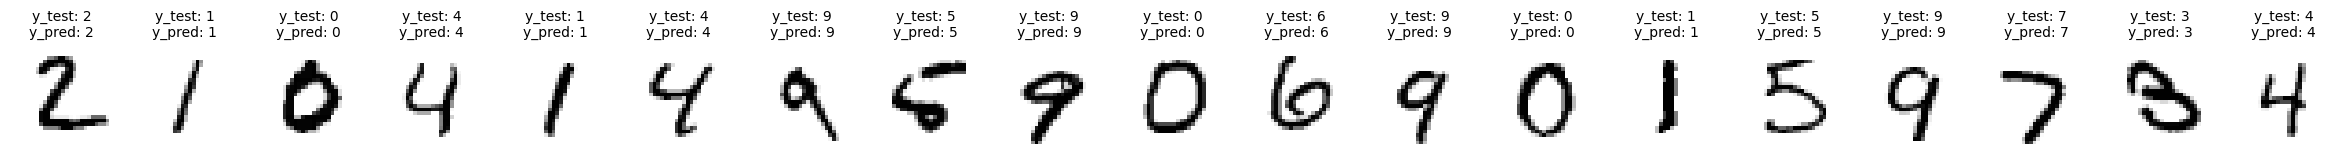

In [19]:
plt.figure(figsize=(30, 30))
for i in range(1, 20):
    plt.subplot(1, 19, i)
    plt.axis('off')
    plt.imshow(X_test[i], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[i]) + '\n' + 'y_pred: ' + str(y_pred[i]), color='black', fontsize=10)
plt.show()

Which one was wrong classified

In [21]:
pred = pd.concat([pd.DataFrame(y_test, columns = ['y_test']), pd.DataFrame(y_pred, columns = ['y_pred'])], axis=1)

In [27]:
pred.head(116)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
111,7,7
112,3,3
113,9,9
114,7,7


In [23]:
error_classify = pred[pred['y_test'] != pred['y_pred']]

In [24]:
error_classify.index[:10]

Int64Index([115, 151, 247, 259, 321, 340, 445, 447, 448, 495], dtype='int64')

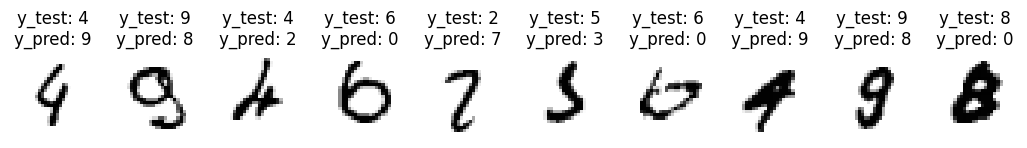

In [25]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), error_classify.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()